<div style="background-color: #add8e6; padding: 10px; height: 70px; border-radius: 15px;">
    <div style="font-family: 'Georgia', serif; font-size: 20px; padding: 10px; text-align: right; position: absolute; right: 50px;">
        Mohammad Idrees Bhat <br>
        <span style="font-family: 'Arial', sans-serif;font-size: 12px; color: #0a0a0a;">Tech Skills Trainer | AI/ML Consultant</span> <!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->
    </div>
</div>

<!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->

<div style="background-color: #002147; padding: 10px; text-align: center; color: white; font-size: 32px; font-family: 'Arial', sans-serif; border-radius: 100px;">
    Feature Selection <br>
    <h3 style="text-align: center; color: white; font-size: 15px; font-family: 'Arial', sans-serif;">  SelectKBest with Chi-Square</h3>
</div


<!-- Link the Montserrat font -->
<link href="https://fonts.googleapis.com/css2?family=Montserrat:wght@700&display=swap" rel="stylesheet">

<!-- Main div with centered content and a flexible box size, no scroll bar -->
<div style="background-color: #baf733; min-height: 100%; width: 100%; display: flex; justify-content: center; align-items: center; position: relative; padding: 20px; box-sizing: border-box; font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 20px; border-radius: 15px;">
    <div style="position: absolute; top: 10px; right: 10px; padding: 5px 10px; font-size: 14px; color: rgba(0, 0, 0, 0.05); border-radius: 10px;">Mohammad Idrees Bhat</div>
    <!-- Fill the below text with question -->
    <!-- Fill the below text with question -->
    <!-- Fill the above text with question -->
    <!-- Fill the above text with question -->
</div>

<div style="background-color: lightgreen; color: black; padding: 4px;">
    <h3> Practical Exercise: Feature Selection in Python
</h3> </div>

Feature selection is all about picking the right features for your model, just like a chef picks the best ingredients for their dish. 

The goal is to improve model performance and reduce complexity.

- Filter Methods (like correlation matrix):
    Identify which features are strongly correlated with the target variable.
- Wrapper Methods (like RFE):
    Use a model to help select the most important features.
- Embedded Methods (like Lasso):
    Perform feature selection as part of the model training process.

"C:\Users\devid\Desktop\datasets\Automobile_data.csv"

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


In [2]:
path = "C:\\Users\\devid\\Desktop\\datasets\\Automobile_data.csv"

# C:\Users\devid\Desktop\datasets\Automobile_data.csv"          ^
# SyntaxError: (unicode error) 'unicodeescape' codec can't decode 

df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
# Handling missing values (replace '?' with NaN and drop missing values)
df.replace("?", np.nan, inplace=True)  # replaces all occurrences of "?" in the df with NaN
df.dropna(inplace=True) # removes any rows in the DataFrame that contain NaN values

# Converting necessary columns to numeric
for col in ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price"]:
    df[col] = pd.to_numeric(df[col])


In [4]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [5]:
# Encoding categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,0,1,0,0,3,1,0,99.8,...,109,4,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,0,1,0,0,3,0,0,99.4,...,136,4,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,0,1,0,0,3,1,0,105.8,...,136,4,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,0,1,1,0,3,1,0,105.8,...,131,4,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,1,1,0,1,3,2,0,101.2,...,108,4,3.50,2.8,8.8,101,5800,23,29,16430


### **Step 1: Correlation Matrix (Filter Method)**

We can start by looking at the correlation between each feature and the target variable (Price). This will help us understand which features have a strong relationship with the target.


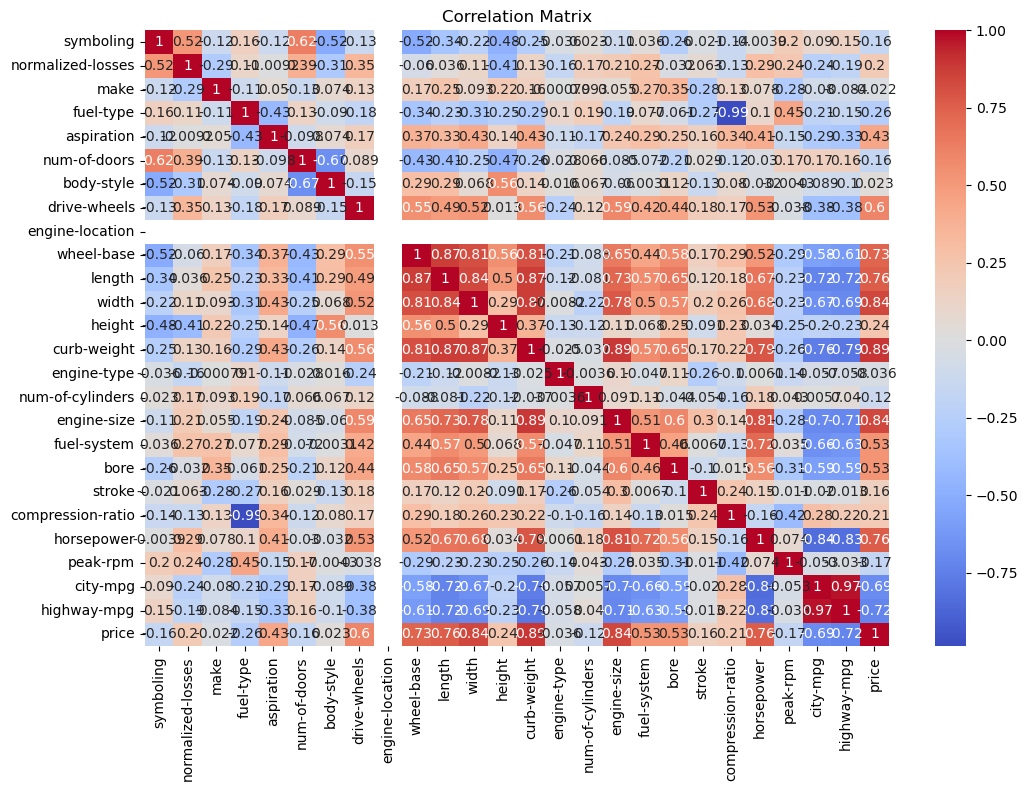

In [6]:
# Correlation matrix for numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


This matrix helps us see relationships between features. 

Compression Ratio and Fuel Type are almost perfectly related. This means that if one of them increases, the other one also increases (or decreases) in almost the same way. it indicates a very strong positive linear relationship.

A 0.99 correlation between compression ratio and fuel type means that these two features are extremely similar, and you could probably remove one of them without affecting the overall performance of your model.

Multicollinearity: If two features are highly correlated (such as 0.99), it can cause multicollinearity. This is when multiple features are providing redundant or overlapping information. 

If both compression ratio and fuel type describe similar patterns of behavior in the dataset (e.g., certain types of fuel may correspond to higher compression ratios), having both features might not add much new information.

Remove one of the highly correlated features: Since compression ratio and fuel type are highly correlated, you can choose to keep only one of them to reduce redundancy. 

If two features have a correlation above a certain threshold (usually 0.8 or 0.9), they are considered highly correlated. In this case, 0.99 is very high and suggests a strong relationship.


### **Using Chi-Square Test with SelectKBest** (Filter Method)

In [7]:
# Separate features and target
X = df.drop("price", axis=1)  # Features
y = df["price"]  # Target variable

In [8]:
# Apply SelectKBest for chi-square test
select_k_best = SelectKBest(chi2, k=5)  # Selecting 5 best features
X_new = select_k_best.fit_transform(X, y)

# Display selected features
selected_features = X.columns[select_k_best.get_support()]
print("Selected Features using Chi-Square Test:", selected_features.tolist())


ValueError: Input X must be non-negative.

**Practical example of what can happen during feature selection:**

Error due to presence of negative values in X

In [9]:
# check if any negative values
print((X < 0).any().any())  # This will print True if any negative values are present in the entire DataFrame


True


If your features contain categorical variables (e.g., strings), chi2 can’t be applied directly. You will need to encode categorical variables into numerical form (e.g., using one-hot encoding):

**One-Hot Encoding** is a method used to convert categorical data into a format that can be provided to machine learning algorithms, which typically require numerical input. 

In [10]:
X = pd.get_dummies(X)  # One-hot encode categorical variables
X

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
3,2,164,0,1,0,0,3,1,0,99.8,...,2,109,4,3.19,3.40,10.0,102,5500,24,30
4,2,164,0,1,0,0,3,0,0,99.4,...,1,136,4,3.19,3.40,8.0,115,5500,18,22
6,1,158,0,1,0,0,3,1,0,105.8,...,1,136,4,3.19,3.40,8.5,110,5500,19,25
8,1,158,0,1,1,0,3,1,0,105.8,...,1,131,4,3.13,3.40,8.3,140,5500,17,20
10,2,192,1,1,0,1,3,2,0,101.2,...,2,108,4,3.50,2.80,8.8,101,5800,23,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,17,1,0,0,3,2,0,109.1,...,2,141,4,3.78,3.15,9.5,114,5400,23,28
201,-1,95,17,1,1,0,3,2,0,109.1,...,2,141,4,3.78,3.15,8.7,160,5300,19,25
202,-1,95,17,1,0,0,3,2,0,109.1,...,3,173,4,3.58,2.87,8.8,134,5500,18,23
203,-1,95,17,0,1,0,3,2,0,109.1,...,3,145,2,3.01,3.40,23.0,106,4800,26,27


Negative values still there

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X["symboling"] = label_encoder.fit_transform(X["symboling"])


In [23]:
# check if any negative values
print((X < 0).any().any())

False


In [24]:
# Apply SelectKBest for chi-square test
select_k_best = SelectKBest(chi2, k=5)  # Selecting 5 best features
X_new = select_k_best.fit_transform(X, y)

# Display selected features
selected_features = X.columns[select_k_best.get_support()]
print("Selected Features using Chi-Square Test:", selected_features.tolist())


Selected Features using Chi-Square Test: ['normalized-losses', 'curb-weight', 'engine-size', 'horsepower', 'peak-rpm']


These features have shown a significant relationship with the target variable (price)

The Chi-Square Test works by **evaluating the independence** between the features and the target variable. 

It helps **identify which features contribute meaningfully** to predicting the target. The result of the test is a list of features that have the most significant relationships with the target variable.

### **Step 2: Recursive Feature Elimination (RFE)** (Wrapper Method)

We can now use RFE to select the most important features for a classifier. We will use logistic regression for this simple example.

Recursive Feature Elimination (RFE) is a method to iteratively remove less significant features, focusing on those that enhance predictive accuracy.



In [14]:
# Initialize a logistic regression model
model = LogisticRegression(C=0.1, max_iter=500)

# Define RFE (using the model to select features)
rfe = RFE(model, n_features_to_select=5)  # Selecting 5 features

# Fit RFE
X_rfe = rfe.fit_transform(X, y)
selected_features_rfe = X.columns[rfe.support_]

print("Selected Features using RFE:", selected_features_rfe.tolist())


c:\Users\devid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\devid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected Features using RFE: ['normalized-losses', 'curb-weight', 'engine-size', 'horsepower', 'peak-rpm']


c:\Users\devid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


indicates that the Logistic Regression model was unable to converge within the default number of iterations. This can happen when the model is struggling to find an optimal solution within the allowed iteration limit.

Logistic regression uses optimization techniques (like LBFGS, which is an optimization algorithm) to find the best coefficients for the model.

We could fix this by doing some other changes like change the number of iterations etc, ut let's use another model instead

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Initialize a random forest classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define RFE (using the model to select features)
rfe = RFE(model, n_features_to_select=5)  # Selecting 5 features

# Fit RFE
X_rfe = rfe.fit_transform(X, y)
selected_features_rfe = X.columns[rfe.support_]

print("Selected Features using RFE:", selected_features_rfe.tolist())


Selected Features using RFE: ['normalized-losses', 'height', 'curb-weight', 'horsepower', 'city-mpg']


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Initialize a linear regression model
model = LinearRegression()

# Define RFE (using the model to select features)
rfe = RFE(model, n_features_to_select=5)  # Selecting 5 features

# Fit RFE
X_rfe = rfe.fit_transform(X, y)

# Get selected features
selected_features_rfe = X.columns[rfe.support_]

print("Selected Features using RFE:", selected_features_rfe.tolist())


Selected Features using RFE: ['aspiration', 'drive-wheels', 'width', 'fuel-system', 'stroke']


RFE works by recursively removing the least important features, based on the model's performance, until the desired number of features is reached

RFE selected these features because they contribute the most to the model's prediction.

normalized-losses: Likely indicates how much the car can depreciate, and has a strong influence on its pricing and risk.

height, curb-weight, horsepower, and city-mpg: 

These features are likely highly correlated with the car's performance, fuel efficiency, and general characteristics that buyers care about, which is why they were selected.

### **Step 3: Lasso (Embedded Method)**
Lastly, we can use Lasso (L1 regularization) to perform feature selection while training a model.

In [17]:
# Initialize a random forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to get feature importances
model_rf.fit(X, y)

feature_importances = pd.Series(model_rf.feature_importances_, index=X.columns)

top_features_embedded = feature_importances.nlargest(5).index

print("Selected Features using Embedded Method (Random Forest):", top_features_embedded.tolist())


Selected Features using Embedded Method (Random Forest): ['curb-weight', 'height', 'normalized-losses', 'city-mpg', 'highway-mpg']


<div style="background-color: lightgreen; color: black; padding: 4px;">
    <h3> Extra parts
</h3> </div>

### **One-Hot Encoding** in Python

In [18]:
import pandas as pd

df = pd.DataFrame({
    'color': ['Red', 'Blue', 'Green', 'Blue', 'Red'],
    'shape': ['Circle', 'Square', 'Circle', 'Square', 'Circle']
})

In [19]:
df

,color,shape
0,Red,Circle
1,Blue,Square
2,Green,Circle
3,Blue,Square
4,Red,Circle


Use the pd.get_dummies() function to automatically generate one-hot encoded columns.

In [20]:
df_encoded = pd.get_dummies(df, columns=['color', 'shape'])

In [21]:
df_encoded

,color_Blue,color_Green,color_Red,shape_Circle,shape_Square
0,False,False,True,True,False
1,True,False,False,False,True
2,False,True,False,True,False
3,True,False,False,False,True
4,False,False,True,True,False


<div style="background-color: lightblue; color: white; padding: 10px; text-align: center;">
    <h1>____________________         BEST OF LUCK   ...  :)        _____________________
        <!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->
</h1> </div>

<div style="background-color: #002147; color: #fff; padding: 30px; text-align: center;">
    <h1>THANK YOU!
        <!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->
</h1> </div>

<!--- Mohammad Idrees Bhat | Mohammad Idrees Bhat --->

<h2 style="background-color: #ffe4e1; color: #2f4f4f; padding: 10px; border-radius: 10px; width: 350px; text-align: center; float: right; margin: 20px 0;">
    Mohammad Idrees Bhat<br>
    <span style="font-size: 12px; color: #696969;">
        Tech Skills Trainer | AI/ML Consultant
    </span>
</h2>

<!--- Mohammad Idrees Bhat | Tech Skills Trainer | AI/ML Consultant --->